# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names 
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert 
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few 
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


Load the dataset

In [9]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


Delete the duplicate rows

In [10]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

use CountVectorizer to prepare and vectorize the text in the Text column

In [11]:
# Convert the text to vectorizer
x = df['Text']

# Obtain the label
y = df['Sentiment']

Split the dataset

In [12]:
from sklearn.model_selection import train_test_split

# Splite the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance, the ngram_range represents the length range 
# of phrase segmentation,the stop_words parameter is set to "english" to remove 
# common English stop words like "and", "the", and "a", min_df is to serve as a 
# threshold to delete some words which have a frequency lower then min_df.
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

Task 1:Find the best vectorization method

1) CountVectorizer

The accuracy of the model is: 0.937799043062201
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Positive       0.90      0.98      0.94       211
    Negative       0.98      0.89      0.93       207

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



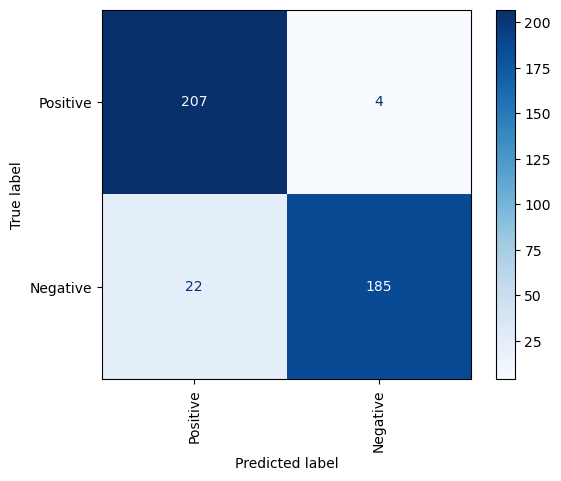

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import os

# --- New Imports ---
from sklearn.metrics import classification_report, precision_score, recall_score

# Assuming 'df' is your DataFrame loaded with 'Text' and 'Sentiment' columns

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train_vectorized, y_train)

# --- Generate predictions (good practice to do this once) ---
y_pred = model.predict(x_test_vectorized)

# Display the confusion matrix
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

# --- Calculate and print all metrics ---

# 1. Accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test, y_pred)))
print("-" * 50)

# 2. Classification Report (Recommended Method)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

# 3. Individual scores (Optional)
# precision = precision_score(y_test, y_pred, pos_label='Positive')
# recall = recall_score(y_test, y_pred, pos_label='Positive')
# print(f'\nIndividually calculated Precision: {precision:.4f}')
# print(f'Individually calculated Recall: {recall:.4f}')

2) HashingVectorizer

The accuracy of the model is: 0.9545454545454546
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.97      0.96       211
    Negative       0.97      0.94      0.95       207

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



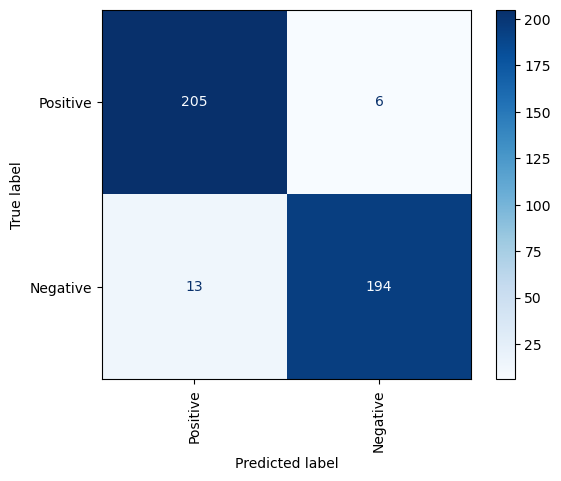

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import os

# --- New Imports ---
from sklearn.metrics import classification_report, precision_score, recall_score

# Assuming 'df' is your DataFrame loaded with 'Text' and 'Sentiment' columns

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train_vectorized, y_train)

# --- Generate predictions (good practice to do this once) ---
y_pred = model.predict(x_test_vectorized)

# Display the confusion matrix
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

# --- Calculate and print all metrics ---

# 1. Accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test, y_pred)))
print("-" * 50)

# 2. Classification Report (Recommended Method)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

# 3. Individual scores (Optional)
# precision = precision_score(y_test, y_pred, pos_label='Positive')
# recall = recall_score(y_test, y_pred, pos_label='Positive')
# print(f'\nIndividually calculated Precision: {precision:.4f}')
# print(f'Individually calculated Recall: {recall:.4f}')

3) TfidfVectorizer

The accuracy of the model is: 0.9545454545454546
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.98      0.96       211
    Negative       0.97      0.93      0.95       207

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



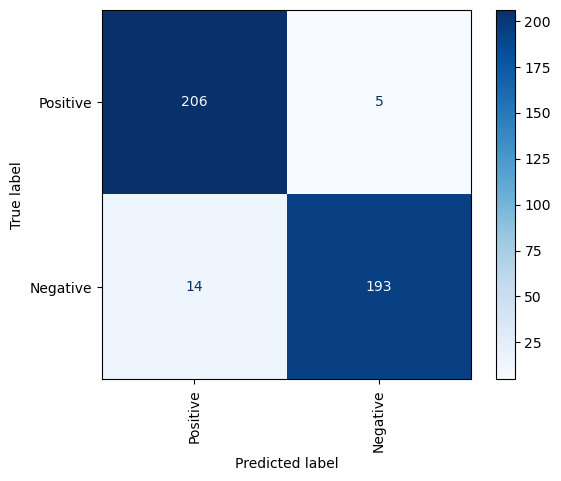

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import os

# --- New Imports ---
from sklearn.metrics import classification_report, precision_score, recall_score

# Assuming 'df' is your DataFrame loaded with 'Text' and 'Sentiment' columns

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
vectorizer = TfidfVectorizer(
     min_df=20,
     norm='l2',
     smooth_idf=True,
     use_idf=True,
     ngram_range=(1, 2),
     stop_words='english'
     )
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train_vectorized, y_train)

# --- Generate predictions (good practice to do this once) ---
y_pred = model.predict(x_test_vectorized)

# Display the confusion matrix
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

# --- Calculate and print all metrics ---

# 1. Accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test, y_pred)))
print("-" * 50)

# 2. Classification Report (Recommended Method)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

# 3. Individual scores (Optional)
# precision = precision_score(y_test, y_pred, pos_label='Positive')
# recall = recall_score(y_test, y_pred, pos_label='Positive')
# print(f'\nIndividually calculated Precision: {precision:.4f}')
# print(f'Individually calculated Recall: {recall:.4f}')

Task 2: Explore the performance of different text classification models 

Logistic Regression

--- Starting Logistic Regression Grid Search ---
Best Parameters: {'C': 0.1}
Best CV Score: 0.9532700365035695
Test Accuracy: 0.9545454545454546


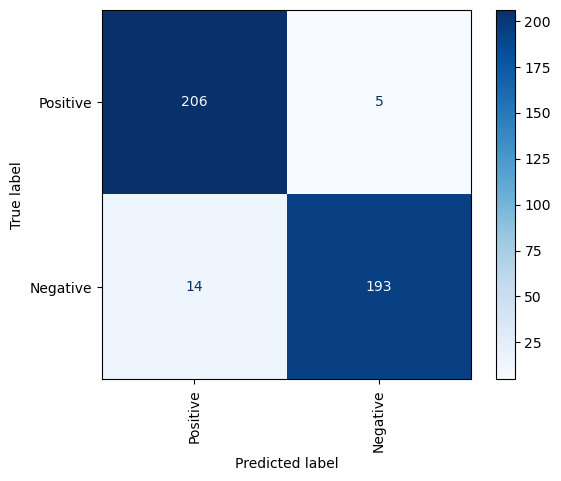

In [24]:
# --- Imports and Setup ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

# It is assumed you have your DataFrame 'df' with 'Text' and 'Sentiment' columns loaded.
# Example: df = pd.read_csv('your_data.csv') 

# --- Vectorization ---
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)

x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Model Training with GridSearchCV ---
print("--- Starting Logistic Regression Grid Search ---")
model = LogisticRegression(max_iter=2000, random_state=0)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")
model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = model.predict(x_test_vectorized)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)

KNN

--- Starting KNN Grid Search ---
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best CV Score: 0.8945460430490371
Test Accuracy: 0.9234449760765551


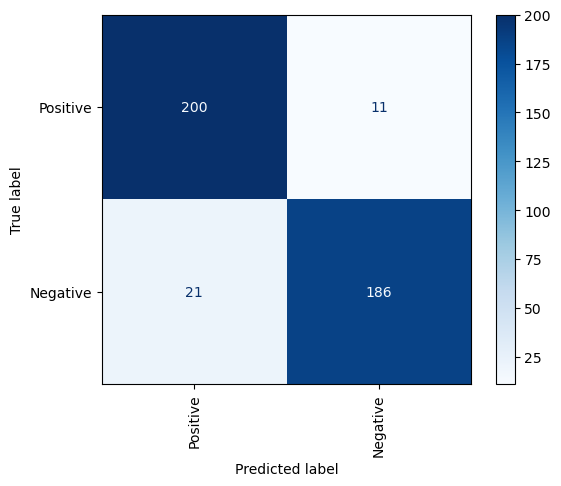

In [20]:
# --- Imports and Setup ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

# It is assumed you have your DataFrame 'df' with 'Text' and 'Sentiment' columns loaded.

# --- Vectorization ---
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Model Training with GridSearchCV ---
print("--- Starting KNN Grid Search ---")
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")
model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = model.predict(x_test_vectorized)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)

RF

--- Starting Random Forest Grid Search (this may take a while) ---
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.9556688424951897
Test Accuracy: 0.9665071770334929


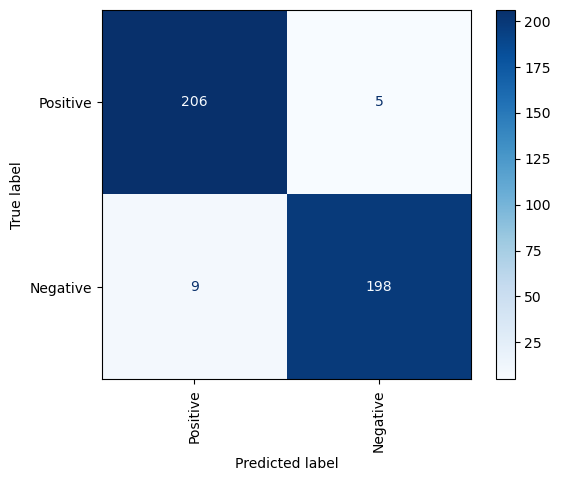

In [21]:
# --- Imports and Setup ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

# It is assumed you have your DataFrame 'df' with 'Text' and 'Sentiment' columns loaded.

# --- Vectorization ---
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Model Training with GridSearchCV ---
# Note: This grid is quite large and may take a long time to run.
print("--- Starting Random Forest Grid Search (this may take a while) ---")
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")
model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = model.predict(x_test_vectorized)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)

XGBoost

--- Starting XGBoost Grid Search ---


/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:52:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1755048541311/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:52:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1755048541311/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:52:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1755048541311/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/guanzhou/miniforge3/envs/ai-env/lib/python3.11/site-packages/xg

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV Score: 0.952676628724533
Test Accuracy: 0.9665071770334929


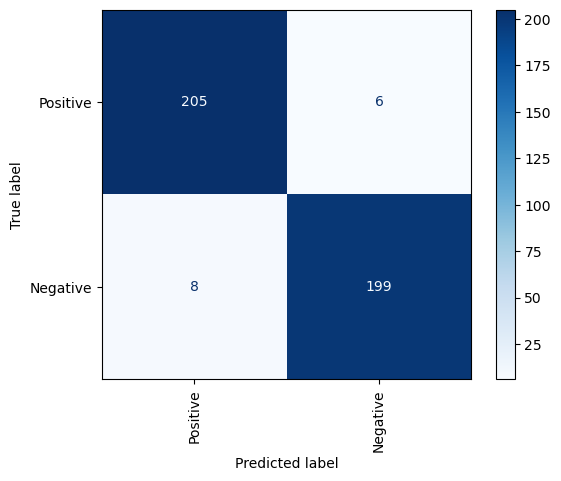

In [22]:
# --- Imports and Setup ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

# It is assumed you have your DataFrame 'df' with 'Text' and 'Sentiment' columns loaded.

# --- Vectorization ---
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Model Training with GridSearchCV ---
print("--- Starting XGBoost Grid Search ---")
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")
model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = model.predict(x_test_vectorized)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)

SVM

--- Starting SVM Grid Search ---
Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9532700365035695
Test Accuracy: 0.9593301435406698


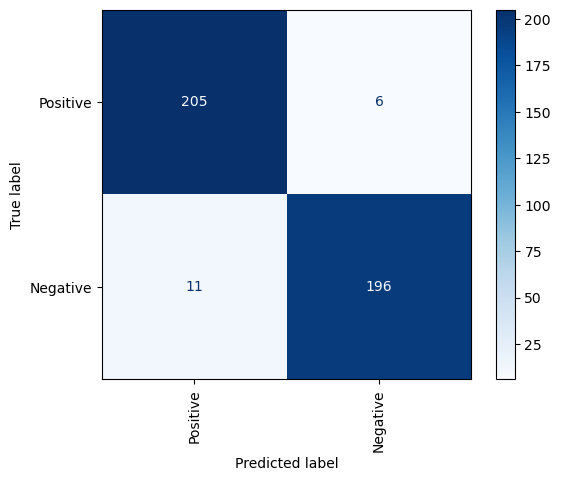

In [19]:
# --- Imports and Setup ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

# It is assumed you have your DataFrame 'df' with 'Text' and 'Sentiment' columns loaded.

# --- Vectorization ---
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Model Training with GridSearchCV ---
print("--- Starting SVM Grid Search ---")
model = SVC(probability=True, random_state=0)
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")
model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = model.predict(x_test_vectorized)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)

Naive Bayes

--- Starting Naive Bayes Grid Search ---
Best Parameters: {'alpha': 1.0}
Best CV Score: 0.9472730215245185
Test Accuracy: 0.9401913875598086


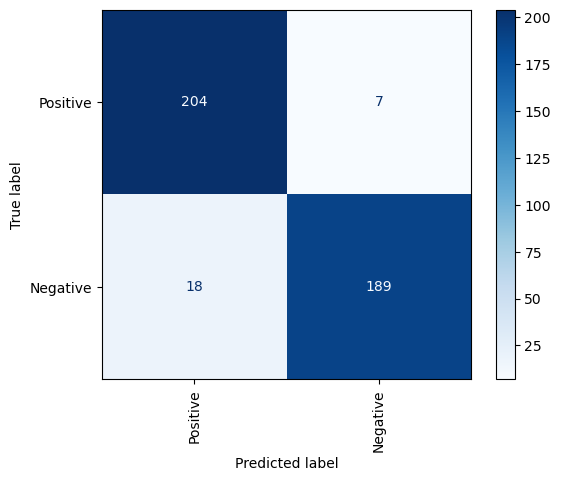

In [23]:
# --- Imports and Setup ---
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay as cmd

# It is assumed you have your DataFrame 'df' with 'Text' and 'Sentiment' columns loaded.

# --- Vectorization ---
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# --- Model Training with GridSearchCV ---
print("--- Starting Naive Bayes Grid Search ---")
model = BernoulliNB()
# Note: The 'force_alpha' parameter is deprecated/removed in modern scikit-learn versions.
# We will only tune the 'alpha' parameter.
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")
model = grid_search.best_estimator_

# --- Evaluation ---
y_pred = model.predict(x_test_vectorized)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
)